# **Table of Content**

1. *Importing Libraries*

2. *Data Collection*

3. *Data Exploration and Pre-Processing*

4. *Data Visualization*

5. *Data Preparation*

6. *Choosing Number of Cluster*

7. *Clustering Using K-means Algorithm*

8. *Visualizing the Cluster*

9. *Customer Segment Profiling*

10. *Summary of Findings and Insights*

---

## **Importing Libraries**

In [53]:
# important libraries...
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# libraries for utilities...
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# libraries for clustering...
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#fontdict
font_l={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
font_t={'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }


---

## **Data Collection**

In [3]:
# Importing opendataset library and downloading dataset
# one time executin only
# import opendatasets as ods
# ods.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

In [4]:
# Reading the dataset
df = pd.read_csv("X:\Internship\INTERNSAVY-s_TASK\Task-3\customer-segmentation-tutorial-in-python\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---

## **Data Exploration and Pre-Processing**

In [5]:
# last five records
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
# dimension of dataset
print(f"Dataset conatin {df.shape[0]} rows and {df.shape[1]} columns")

Dataset conatin 200 rows and 5 columns


In [7]:
# Columns of dataset
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
# basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# basic statistics on records of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
# Changing column names to make it easily accessible and readable

df.rename(columns={'CustomerID': 'id', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'}, inplace=True)

df.columns

Index(['id', 'Gender', 'Age', 'income', 'score'], dtype='object')

In [11]:
# encoding via mapping male=1 and female=0 in Gender column

df["Gender"]= df["Gender"].map({"Male":1, "Female":0})

In [12]:
df.head()

,id,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


---

## **Data Visualization**

In [15]:
# using pre-built matplotlib style
plt.style.use('fivethirtyeight')

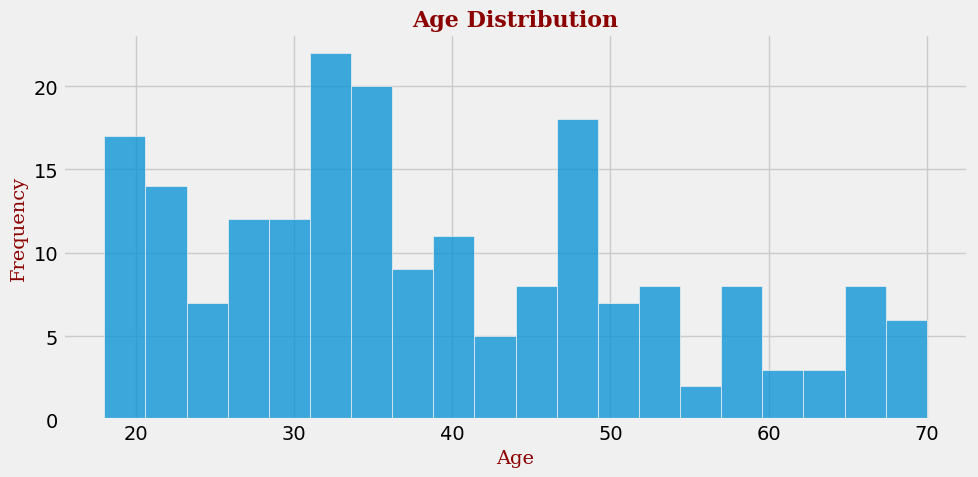

In [25]:
# Histogram of Age
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution', fontdict=font_t)
plt.xlabel('Age', fontdict=font_l)
plt.ylabel('Frequency', fontdict=font_l)
plt.tight_layout()
plt.show()

> **Insight:-** There are customers of wide variety of range

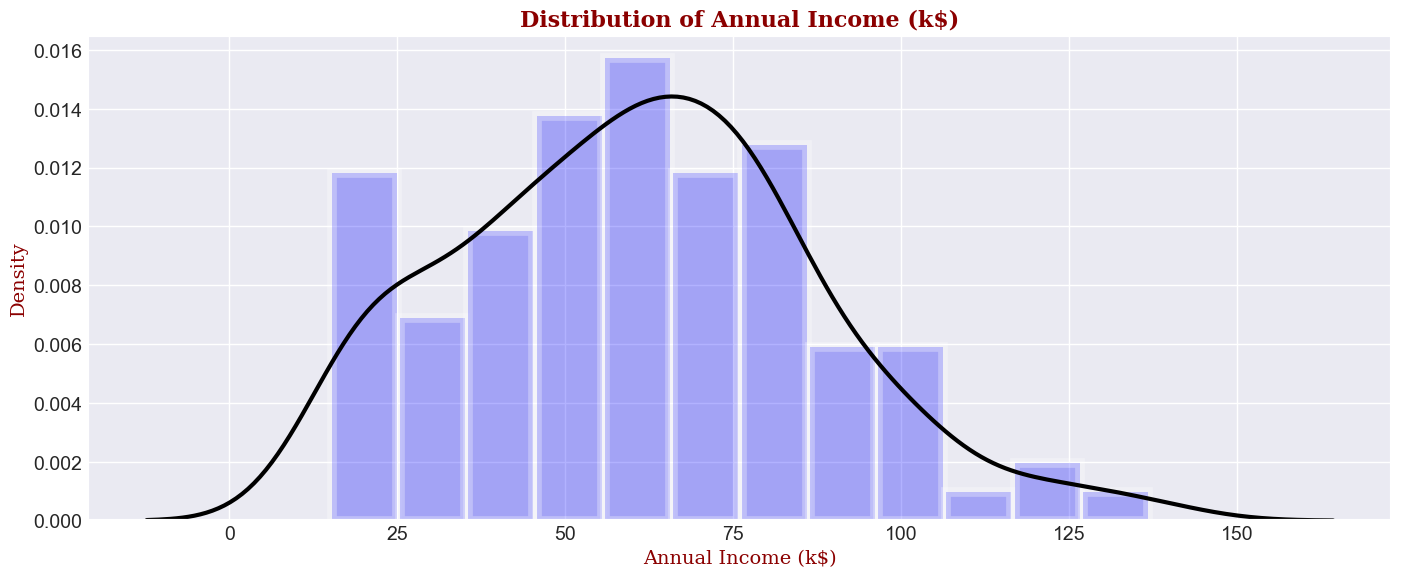

In [42]:
# Distribution of Annual Income
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.distplot(df["income"], bins=12, color='Blue', kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"linewidth": 7,"alpha": 0.3, "rwidth":0.95 })
plt.title("Distribution of Annual Income (k$)", fontdict=font_t)
plt.xlabel("Annual Income (k$)", fontdict=font_l)
plt.ylabel("Density", fontdict=font_l)
plt.show()

>**Insight:-** Most of the customers annual income lie between 50k$ - 80k$

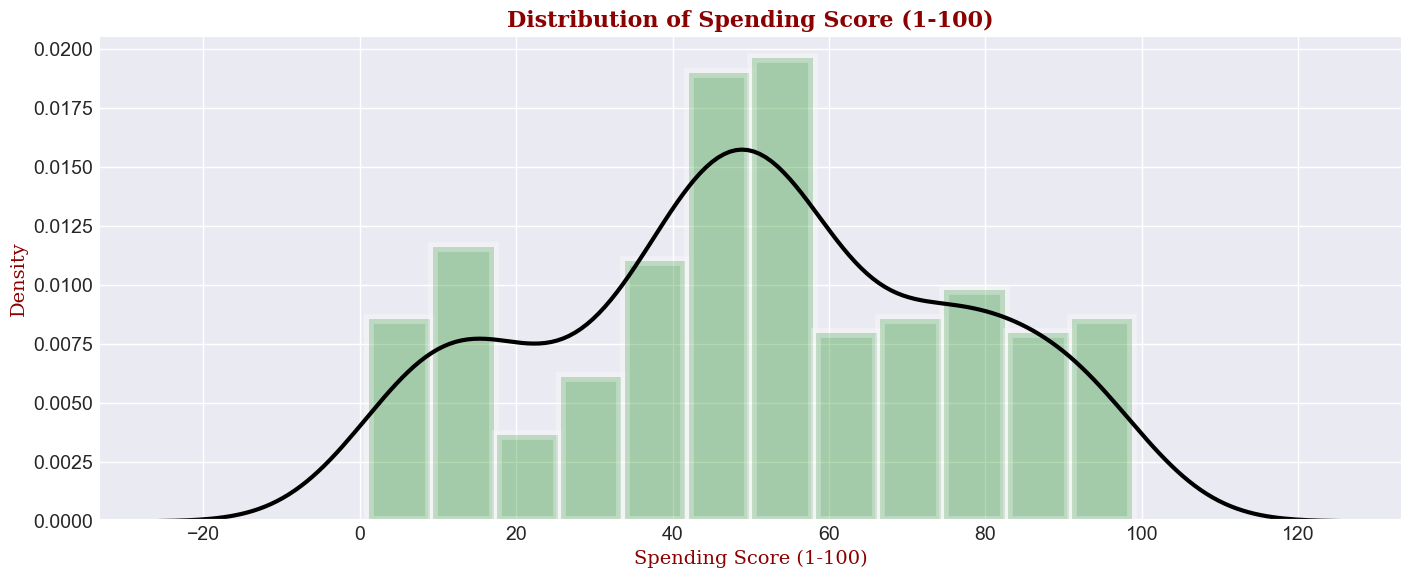

In [48]:
# Distribution of Spending Score (1-100)
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.distplot(df["score"], bins=12, color='green', kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"linewidth": 7,"alpha": 0.3, "rwidth":0.95 })
plt.title("Distribution of Spending Score (1-100)", fontdict=font_t)
plt.xlabel("Spending Score (1-100)", fontdict=font_l)
plt.ylabel("Density", fontdict=font_l)
plt.show()

>**Insight:-** Most customer spending score lie between 40-60.

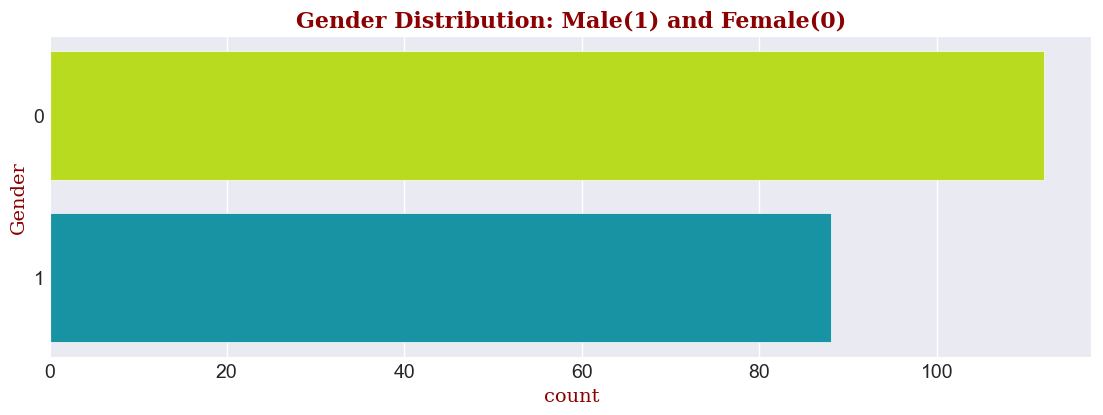

In [47]:
# Countplot of gender
plt.figure(figsize = (12 , 4))
sns.countplot(y = 'Gender' , data = df, orient='h', palette="nipy_spectral_r")
plt.title("Gender Distribution: Male(1) and Female(0)", fontdict=font_t)
plt.xlabel('count', fontdict=font_l)
plt.ylabel('Gender', fontdict=font_l)
plt.show()
sns.set_style('darkgrid')

> Insight: Females are more than males

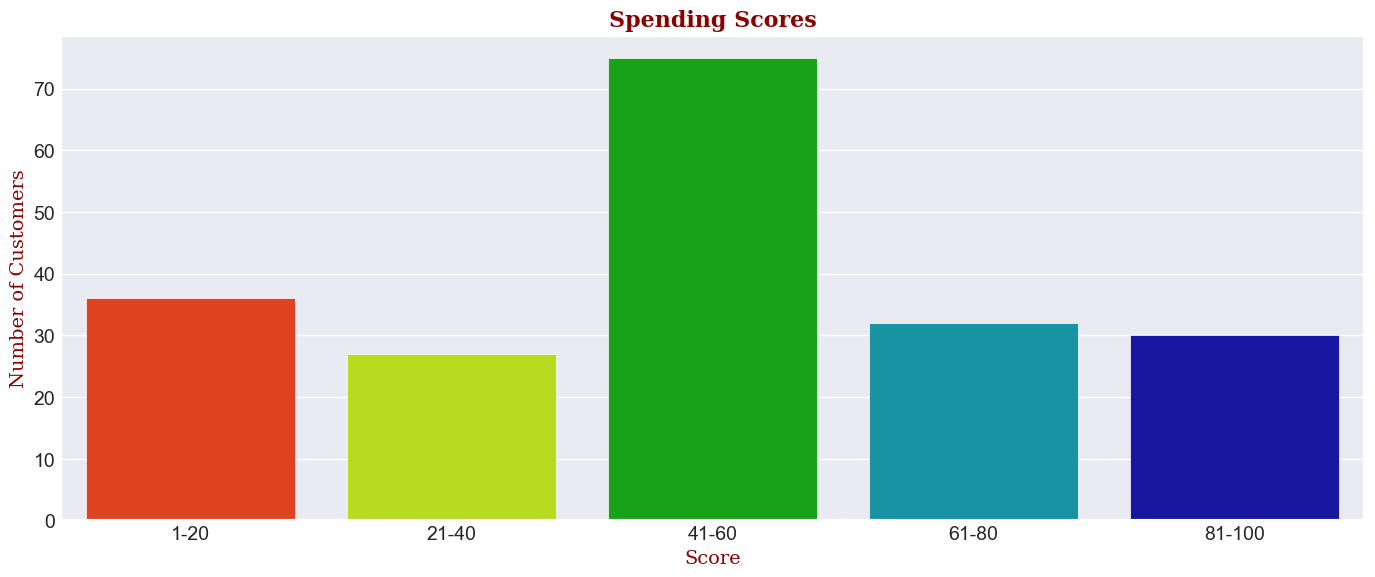

In [50]:
# Barplot for Spending Score(1-100)

ss1_20 = df["score"][(df["score"] >= 1) & (df["score"] <= 20)]
ss21_40 = df["score"][(df["score"] >= 21) & (df["score"] <= 40)]
ss41_60 = df["score"][(df["score"] >= 41) & (df["score"] <= 60)]
ss61_80 = df["score"][(df["score"] >= 61) & (df["score"] <= 80)]
ss81_100 = df["score"][(df["score"] >= 81) & (df["score"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores", fontdict=font_t)
plt.xlabel("Score", fontdict=font_l)
plt.ylabel("Number of Customers", fontdict=font_l)
plt.show()

**Conclusion**: It is now clear that most customer's *Spending Score* lie within 41-60

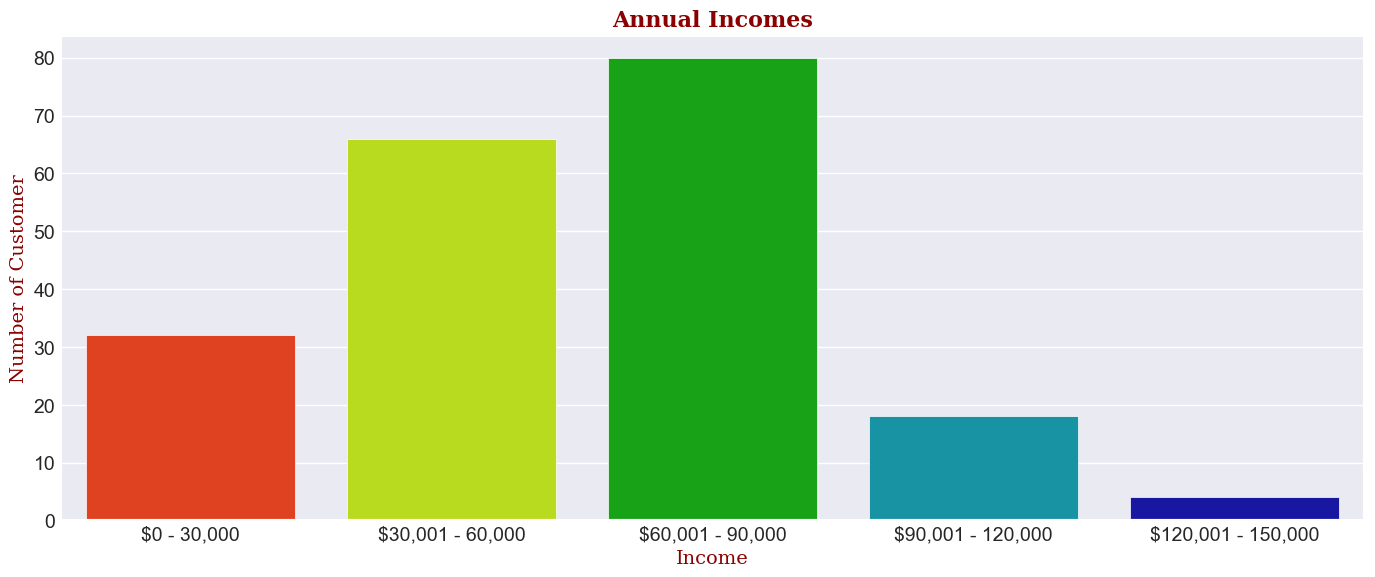

In [51]:
# Barplot for Annual Income
ai0_30 = df["income"][(df["income"] >= 0) & (df["income"] <= 30)]
ai31_60 = df["income"][(df["income"] >= 31) & (df["income"] <= 60)]
ai61_90 = df["income"][(df["income"] >= 61) & (df["income"] <= 90)]
ai91_120 = df["income"][(df["income"] >= 91) & (df["income"] <= 120)]
ai121_150 = df["income"][(df["income"] >= 121) & (df["income"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes", fontdict=font_t)
plt.xlabel("Income", fontdict=font_l)
plt.ylabel("Number of Customer", fontdict=font_l)
plt.show()

**Conclusion**: It is now clear that most customer's *Annual Income* lie within 60k$-90k$

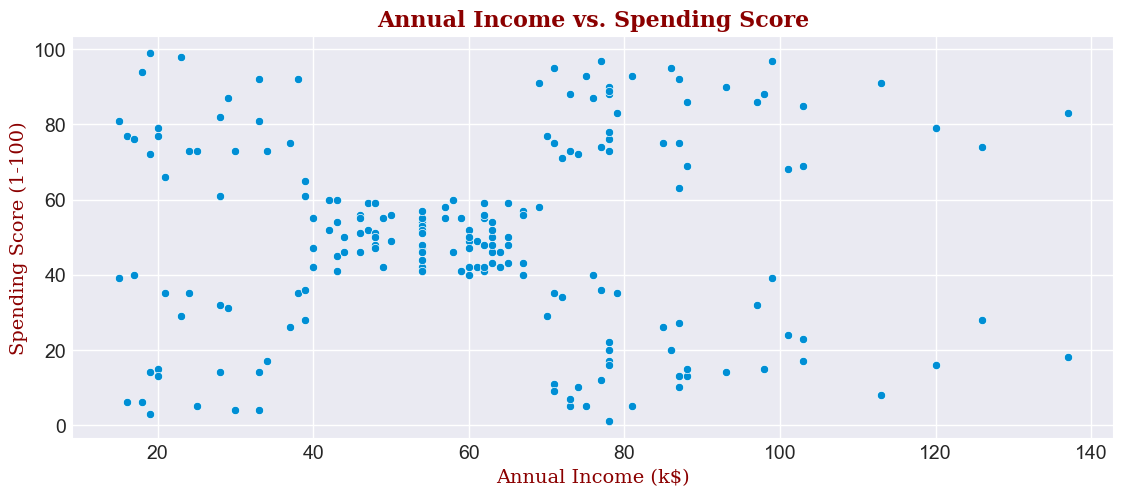

In [52]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.scatterplot(data=df, x='income', y='score')
plt.title('Annual Income vs. Spending Score', fontdict=font_t)
plt.xlabel('Annual Income (k$)', fontdict=font_l)
plt.ylabel('Spending Score (1-100)', fontdict=font_l)
plt.show()

---

## **Data Preparation**

In [54]:
# Normalize numerical variables (Age, Annual Income, Spending Score)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'income', 'score']])
df[['Age', 'income', 'score']] = df_scaled

In [55]:
df.head()

,id,Gender,Age,income,score
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


---

## **Choosing the Clusters**

In [56]:
# Elbow method to find the optimal number of clusters (K)
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

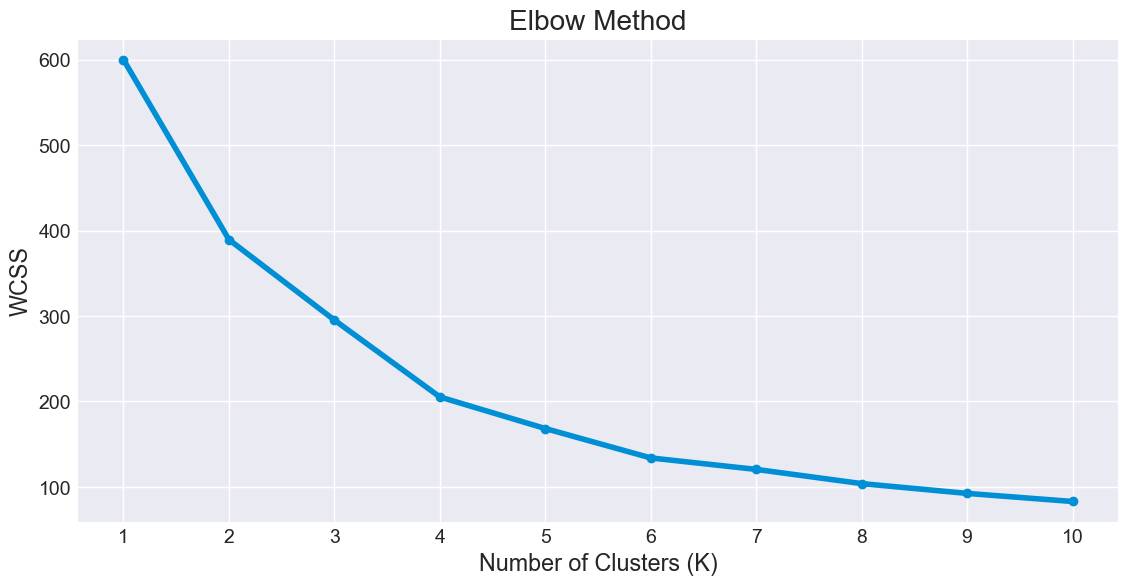

In [58]:
# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11))
plt.show()

> **Insight:** The elbow method helps us to choose the optimal K value. In this case, the elbow point is around K=5.

---

## **Clustering Using K-Means Algorithm**

In [59]:
# K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

---

## **Visualizing the Clustering**

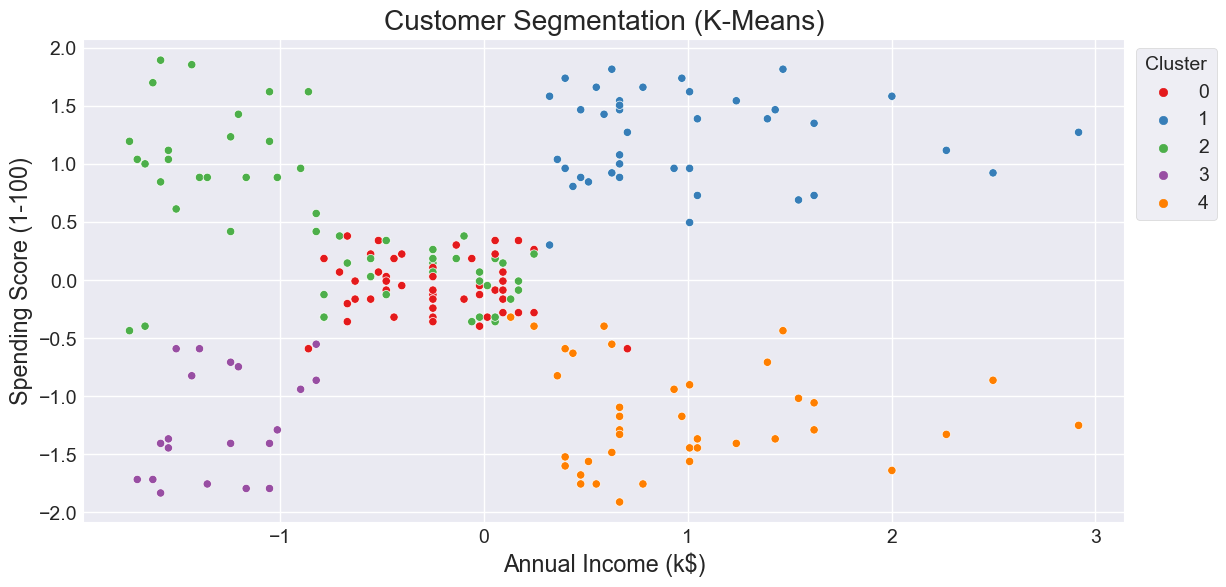

In [61]:
# Scatter plot of Annual Income vs. Spending Score, colored by clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='income', y='score', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

---

## **Customer Segment Profiling**

In [69]:
# Calculate the mean values of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()

In [63]:
# Display the customer segment profiles
print(cluster_means)

                 id    Gender       Age    income     score
Cluster                                                    
0         83.872340  0.425532  1.204841 -0.235773 -0.052368
1        161.025000  0.450000 -0.428806  0.974847  1.216085
2         55.648148  0.407407 -0.980679 -0.743060  0.467440
3         24.100000  0.400000  0.531074 -1.290508 -1.236467
4        159.743590  0.512821  0.073331  0.974945 -1.197297


In [68]:
# Printing the customerID according to the groups.

cust1 = df[df.Cluster==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.id.values)
print("============================================================================================\n")

cust2 = df[df.Cluster==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.id.values)
print("============================================================================================\n")

cust3 = df[df.Cluster==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.id.values)
print("============================================================================================\n")

cust4 = df[df.Cluster==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.id.values)
print("============================================================================================\n")

cust5 = df[df.Cluster==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.id.values)
print("============================================================================================\n")

The number of customers in 1st group =  47
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103
 105 107 108 109 110 111 117 118 119 120 161]

The number of customers in 2nd group =  40
The Customer Id are -  [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]

The number of customers in 3rd group =  54
The Customer Id are -  [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66  69  70  76
  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121]

The number of customers in 4th group =  20
The Customer Id are -  [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]

The number of customers in 5th group =  39
The Customer Id are -  [113 122 125 127 129 131 133

---

## **Summary of Findings and Insights**

***The customer segmentation analysis using K-Means with K=5 resulted in distinct customer segments based on their Annual Income and Spending Score. Each segment has different characteristics***:
> **Cluster 0**: High Income, High Spending Score (Target as High-Value Customers)

> **Cluster 1**: Moderate Income, Moderate Spending Score (Target for Encouraging Upselling)

> **Cluster 2**: Low Income, High Spending Score (Target for Promotions or Loyalty Programs)

> **Cluster 3**: Low Income, Low Spending Score (Target for Attracting New Customers)

> **Cluster 4**: High Income, Low Spending Score (Target for Engagement and Retention Strategies)

========================================================================================================================================